<center><h1>Machine Learning Assignment 1: Python Jupyter Notebook</h1><center>
    <center><h3>Arush Sharma 16BCE1127</h3></center>

<p>In this notebook, I have implementing L2 regularization. The dataset used is Melbourne housing dataset.</p>
<p>Firstly, I developed a complex model of very high polynomial degree, inducing overfitting</p>
<p> Then applied regularized on the same model to reduce overfitting</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

<h4>Importing the Melbourne housing dataset</h4>

In [2]:
housing_data=pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
list(housing_data.columns.values)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

<h4>Remove all rows where price is null</h4>

In [4]:
housing_datacopy=housing_data[pd.notnull(housing_data['Price'])].copy()

<h4>Storing Distance in X and Price in y and plotting them</h4>

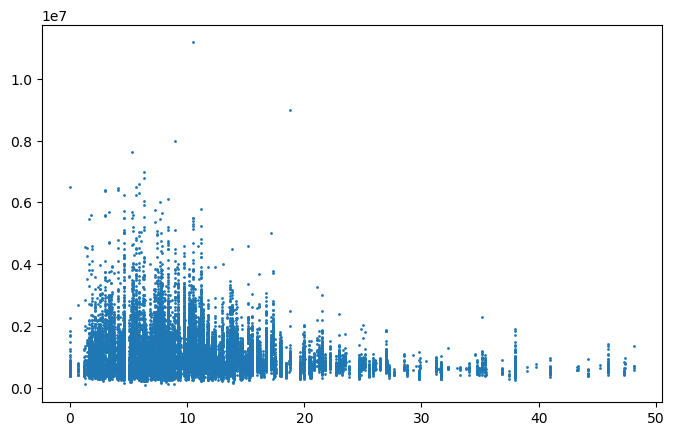

In [5]:
housing_datacopy=housing_data[pd.notnull(housing_data['Price'])].copy()
housing_datacopy=housing_datacopy[pd.notnull(housing_datacopy['Distance'])].copy()
random_housing3 = housing_datacopy.copy();
X=random_housing3['Distance'];
y=random_housing3['Price'];
from matplotlib.pyplot import figure
figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X,y,s=1)


<h4>Splitting the data in train and test, fitting the data into Linear Regression Model, and plotting it</h4>

([], <a list of 0 Text yticklabel objects>)

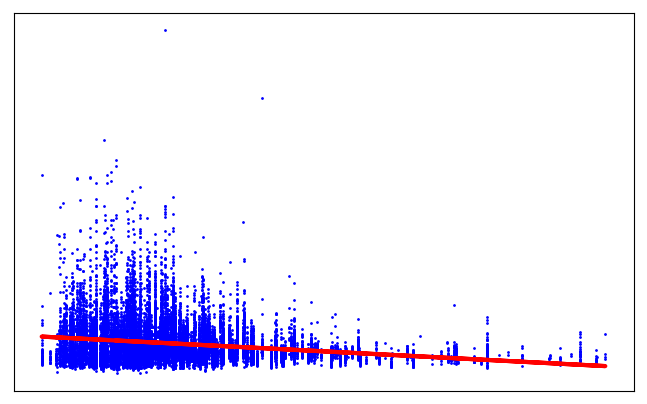

In [69]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
#print(X_train)
#print(np.shape(X_train))

lr=linear_model.LinearRegression()

# Train the model using the training sets
model = lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# Plot outputs
figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X_train, y_train,  color='blue', s=1)
plt.plot(X_test,y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())


<h4> Now force the model to overfit using following method</h4>
<p>Make polynomial features of given data of degree 20. Make a pipline consisting of data and model</p>
<p>Fit the linear model according to the features, essentially doing a polynomial regression</p>
<p>Plot the model results to know the extent of overfitting</p>


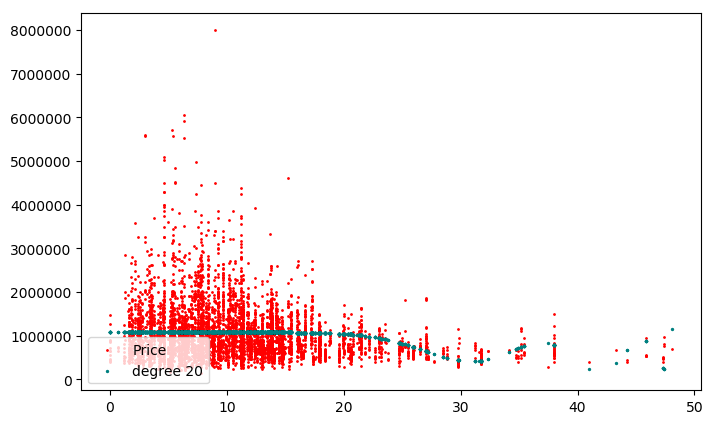

In [86]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

colors = ['teal', 'yellowgreen', 'gold']

for count, degree in enumerate([20]):
    model = make_pipeline(PolynomialFeatures(degree), lr)
    model.fit(X_train, y_train)
    y_polypredict = model.predict(X_test)
    figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
    plt.scatter(X_test, y_test, color='red',s=1)
    #plt.scatter(X_test, y_polypredict, color='blue')
    plt.scatter(X_test, y_polypredict, color=colors[count], s=2,label="degree %d" % degree)

plt.legend(loc='lower left')
plt.show()

<p>The plot is in scattered form, we need more steps to make it continous</p>

<h4>Now making a dataframe, add X_test and y_predicted as columns, arrange it in ascending order, plot it, now a continuous line will come.</h4>

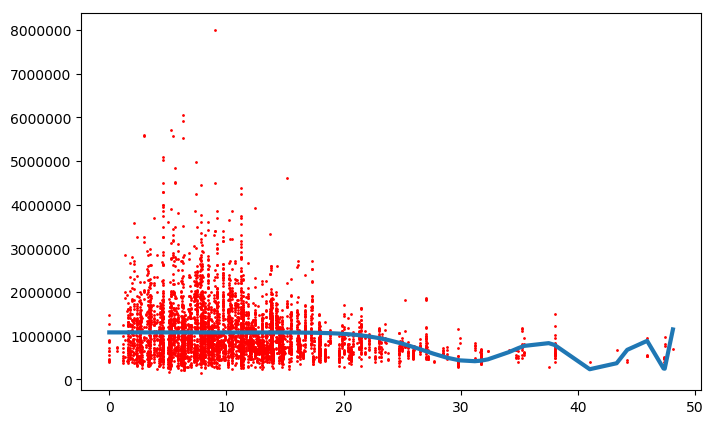

In [126]:
a=np.array(X_test)
a= a[:,0]
b=np.array(y_polypredict)
dataset = pd.DataFrame({'X_test': a, 'y_predict': b}, columns=['X_test', 'y_predict'])
dataset=dataset.sort_values(by=['X_test'],ascending=True)
figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test, color='red',s=1)
plot1=plt.plot(dataset['X_test'],dataset['y_predict'],linewidth=3)

<p> Now we can see that the model has overfitted on the data</p>

<h4>Now applying a L1 Regularization(Lasso). There is a predefined function in Sklearn</h4>
<p>Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.</p>
<p> By L1 regularization, you essentially make the vector x smaller (sparse), as most of its components are useless (zeros), and at the same time, the remaining non-zero components are very “useful”.</p>
<p>We are using features of same degree of polynomial(20) as before<p>

c:\users\arush\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


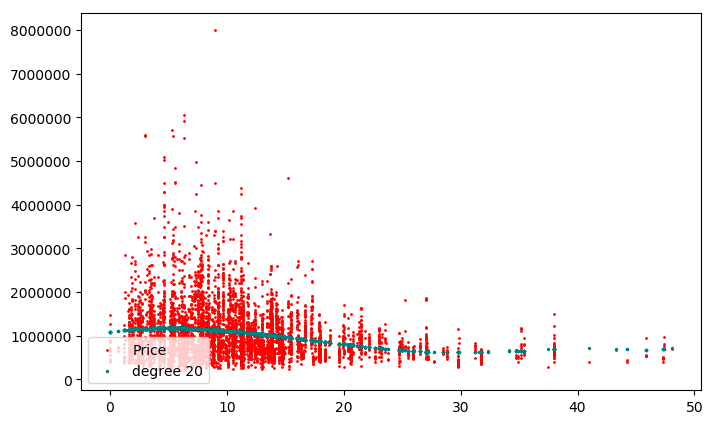

In [130]:
from sklearn.linear_model import Lasso
colors = ['teal', 'yellowgreen', 'gold']
lr=Lasso(alpha=100, max_iter=1000)

for count, degree in enumerate([20]):
    model2 = make_pipeline(PolynomialFeatures(degree), lr)
    model2.fit(X_train, y_train)
    y_polypredict2 = model2.predict(X_test)
    figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
    plt.scatter(X_test, y_test, color='red',s=1)
    #plt.scatter(X_test, y_polypredict, color='blue')
    plt.scatter(X_test, y_polypredict2, color=colors[count], s=2,label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

<h4>Doing the same procedure as done previously to plot a continous curve.</h4>

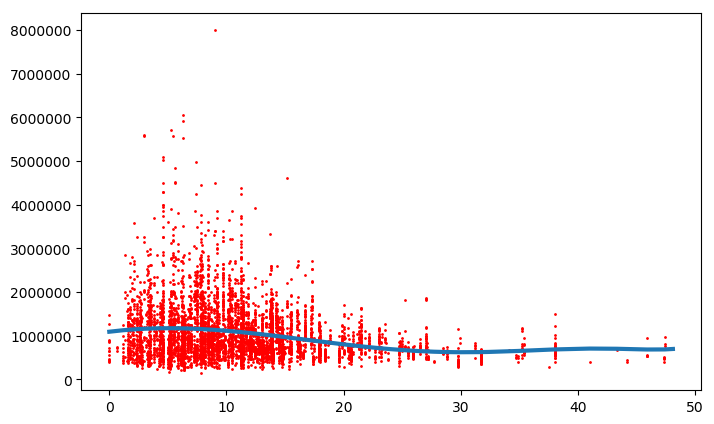

In [116]:
a=np.array(X_test)
a= a[:,0]
b=np.array(y_polypredict2)
dataset2 = pd.DataFrame({'X_test': a, 'y_predict': b}, columns=['X_test', 'y_predict'])
dataset2=dataset2.sort_values(by=['X_test'],ascending=True)
figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test, color='red',s=1)
plot2=plt.plot(dataset2['X_test'],dataset2['y_predict'],linewidth=3)

<p>As we can that after applying regularization, we can see the extent of overfitting has reduced significantly</p>

<h4>Now creating two subplots to compare model with and without regularization.</h4>

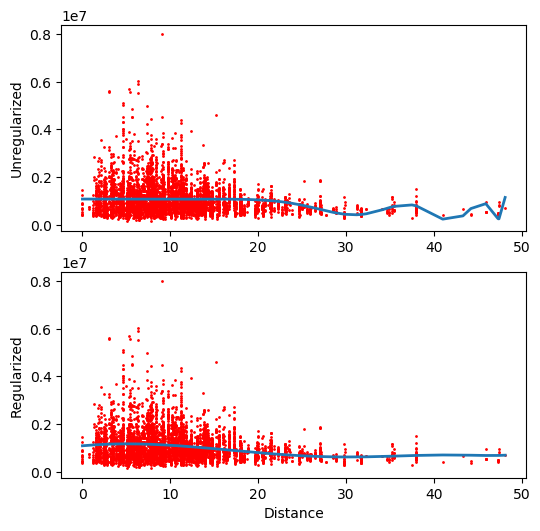

In [114]:
figure(num=None, figsize=(6,6), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
#plt.title('Figure 1: Without Regularization, Figure 2:With Regularization')
plt.scatter(X_test, y_test, color='red',s=1)
plt.plot(dataset['X_test'],dataset['y_predict'],linewidth=2)

plt.ylabel('Unregularized')

plt.subplot(2, 1, 2)
plt.scatter(X_test, y_test, color='red',s=1)
plt.xlabel('Distance')
plt.ylabel('Regularized')
plt.plot(dataset2['X_test'],dataset2['y_predict'],linewidth=2)


<h4> We can clearly see the difference in the extent of overfitting after applying regularization.</h4>